<a href="https://colab.research.google.com/github/MthabisiPatrice/Machine-Learning-/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, r2_score
import altair as alt
from geopy.distance import geodesic
import math



In [28]:
import pandas as pd
df = pd.read_csv('/content/energy-training.csv')
df.head()

,Year,Month,Day,Hours,Minutes,Time-since-start,Appliances,lights,T1,RH_1,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016,5,10,14,50,17267,60,0,25.20,47.126667,...,24.100000,47.525714,18.800,750.150000,78.000000,4.500000,40.000000,14.80,41.358725,41.358725
1,2016,5,4,21,50,16445,60,0,23.39,33.790000,...,20.390000,34.463333,10.900,764.283333,57.333333,3.000000,40.000000,2.77,9.024852,9.024852
2,2016,3,16,20,20,9380,140,20,22.60,37.360000,...,19.600000,36.200000,5.270,765.200000,62.000000,5.666667,23.333333,-1.50,49.291757,49.291757
3,2016,3,19,2,30,9705,50,0,21.79,36.760000,...,19.700000,39.560000,4.700,762.300000,92.000000,3.500000,62.500000,3.50,0.102888,0.102888
4,2016,3,11,5,40,8572,50,0,20.50,36.200000,...,18.166667,41.090000,-0.767,763.600000,93.666667,1.333333,33.000000,-1.70,8.882974,8.882974


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13900 entries, 0 to 13899
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              13900 non-null  int64  
 1   Month             13900 non-null  int64  
 2   Day               13900 non-null  int64  
 3   Hours             13900 non-null  int64  
 4   Minutes           13900 non-null  int64  
 5   Time-since-start  13900 non-null  int64  
 6   Appliances        13900 non-null  int64  
 7   lights            13900 non-null  int64  
 8   T1                13900 non-null  float64
 9   RH_1              13900 non-null  float64
 10  T2                13900 non-null  float64
 11  RH_2              13900 non-null  float64
 12  T3                13900 non-null  float64
 13  RH_3              13900 non-null  float64
 14  T4                13900 non-null  float64
 15  RH_4              13900 non-null  float64
 16  T5                13900 non-null  float6

In [31]:
X = df[['Year', 'Month', 'Day', 'Hours', 'Time-since-start',
     'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
    'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
    'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
     'Tdewpoint']]

Y = df['Appliances']


In [32]:
#training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

,Year,Month,Day,Hours,Minutes,Time-since-start,lights,T1,RH_1,T2,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016,5,10,14,50,17267,0,25.200000,47.126667,25.600000,...,24.100000,47.525714,18.800,750.150000,78.000000,4.500000,40.000000,14.800,41.358725,41.358725
1,2016,5,4,21,50,16445,0,23.390000,33.790000,21.856667,...,20.390000,34.463333,10.900,764.283333,57.333333,3.000000,40.000000,2.770,9.024852,9.024852
2,2016,3,16,20,20,9380,20,22.600000,37.360000,20.200000,...,19.600000,36.200000,5.270,765.200000,62.000000,5.666667,23.333333,-1.500,49.291757,49.291757
3,2016,3,19,2,30,9705,0,21.790000,36.760000,19.000000,...,19.700000,39.560000,4.700,762.300000,92.000000,3.500000,62.500000,3.500,0.102888,0.102888
4,2016,3,11,5,40,8572,0,20.500000,36.200000,16.790000,...,18.166667,41.090000,-0.767,763.600000,93.666667,1.333333,33.000000,-1.700,8.882974,8.882974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13895,2016,3,30,8,10,11323,0,21.500000,40.500000,19.000000,...,20.356667,41.200000,7.550,751.683333,82.333333,4.000000,40.000000,4.650,37.772855,37.772855
13896,2016,4,15,16,30,13677,0,22.700000,39.290000,21.790000,...,20.890000,42.730000,15.500,746.850000,51.833333,8.833333,30.000000,5.580,27.577899,27.577899
13897,2016,3,10,15,40,8488,0,21.066667,36.290000,20.100000,...,18.100000,40.663333,9.830,759.333333,54.333333,1.666667,22.000000,0.967,20.786560,20.786560
13898,2016,5,20,20,0,18738,0,23.500000,44.326667,22.986250,...,22.600000,43.790000,17.300,758.100000,56.000000,4.000000,40.000000,8.500,6.127469,6.127469


In [33]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=4,
    alpha=2,
    n_estimators=850,
    subsample=0.8,
    min_child_weight=5,
    gamma=2
)

# Train the model

xg_reg.fit(X_train, Y_train)

XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=850, n_jobs=None,
             num_parallel_tree=None, ...)

In [34]:
predictions = xg_reg.predict(X_test)
predictions

array([ 58.90211 ,  48.412178, 272.18732 , ...,  29.16772 ,  57.797676,
        49.942455], dtype=float32)

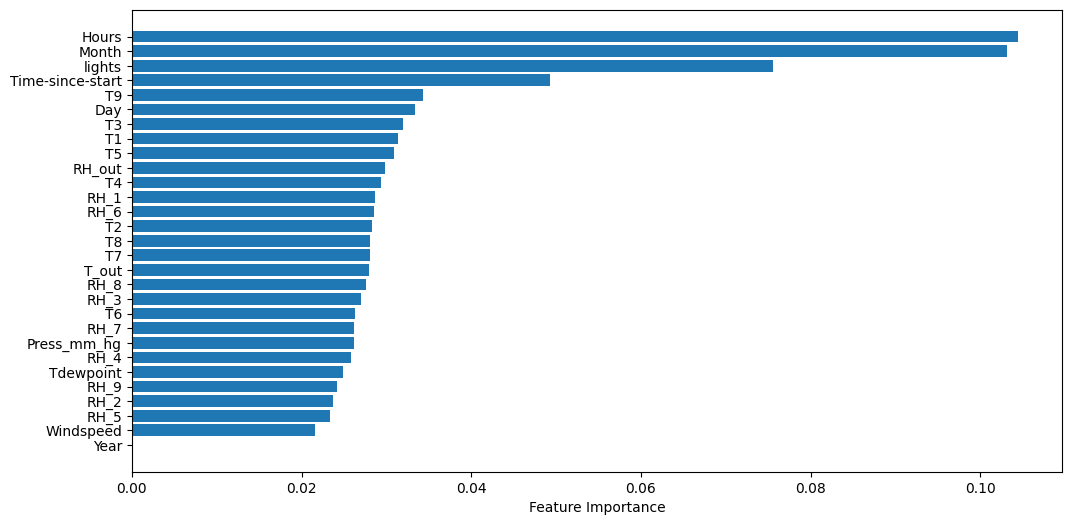

In [35]:
collumns = X_train.columns.to_list
feature_importances = xg_reg.feature_importances_
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importances[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

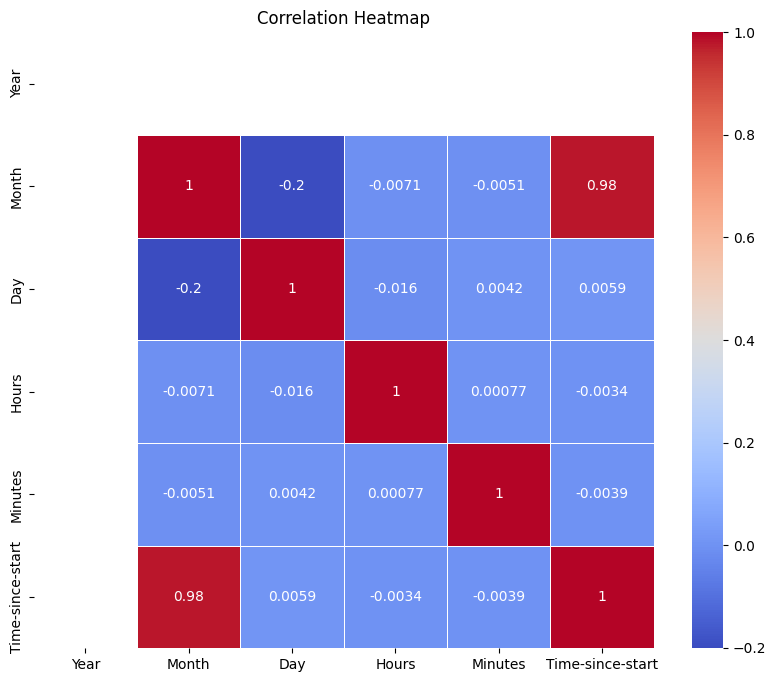

In [36]:
#create a heatmap for brother cannon since they are his favorite visual haha
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

significanta_features = [
    'Year', 'Month', 'Day', 'Hours', 'Minutes', 'Time-since-start',
      ]

correlation_matrix = df[significanta_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# perfomance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
r2 = r2_score(Y_test, predictions)
print(f"R-squared (R2) Score: {r2}")
accuracy = r2_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")


Root Mean Squared Error (RMSE): 68.16181919199815
Mean Absolute Error (MAE): 36.68029444612188
R-squared (R2) Score: 0.48398536443710327
Accuracy: 0.48398536443710327


In [38]:
# creating preedictions
main_data = pd.read_csv('/content/energy-holdout.csv')
main_data.head()

,Year,Month,Day,Hours,Minutes,Time-since-start,lights,T1,RH_1,T2,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016,1,31,4,20,2804,0,20.600000,42.200000,19.600,...,16.79,49.500000,4.40,754.900000,90.333333,4.000000,40.000000,2.93,19.438111,19.438111
1,2016,2,15,6,0,4974,0,19.700000,41.060000,17.890,...,17.79,44.290000,2.50,752.900000,87.000000,6.000000,40.000000,0.50,35.047871,35.047871
2,2016,3,6,15,20,7910,0,20.600000,37.826667,19.500,...,17.79,37.590000,3.47,747.266667,91.333333,5.333333,28.000000,2.20,21.252116,21.252116
3,2016,5,16,18,40,18154,0,23.533333,40.193333,22.600,...,22.79,37.795714,14.30,760.300000,46.000000,2.333333,40.000000,2.70,19.834068,19.834068
4,2016,5,12,22,10,17599,0,25.390000,49.163333,24.315,...,24.06,48.036000,16.50,745.083333,78.666667,1.000000,26.666667,12.70,5.429815,5.429815


In [40]:
x = main_data[['Year', 'Month', 'Day', 'Hours', 'Time-since-start',
     'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
    'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
    'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
     'Tdewpoint']]

In [42]:
#predictions
predictions = xg_reg.predict(x)
predictions

array([ 41.446133,  35.18571 , 117.89468 , ..., 121.71017 , 109.646996,
       210.62706 ], dtype=float32)

In [ ]:
predictions

In [43]:
#create csv
df = pd.DataFrame(predictions)
df.to_csv('predictions.csv', index=False)